In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データセットの読み込み
df = pd.read_csv('diabetes.csv', index_col=0)
df.head(3)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [5]:
# 入力変数と出力変数の切り分け
t = df['Target'].values
x = df.drop(labels=['Target'], axis=1).values

from sklearn.model_selection import train_test_split

# 2 つに分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

# モデルの学習・検証

scikit-learnを用いて学習を行う際のステップ


*   Step1：モデルの定義
*   Step2：モデルの学習
*   Step3：モデルの検証

Step1:モデルの定義

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Step2:モデルの学習

In [7]:
model.fit(x_train, t_train)

LinearRegression()

Step3:モデルの検証

In [8]:
model.coef_

array([ -52.46478548, -193.50733393,  579.49108514,  272.453666  ,
       -504.64830389,  241.62372969,  -69.76596029,   86.61313961,
        721.92083806,   26.78067442])

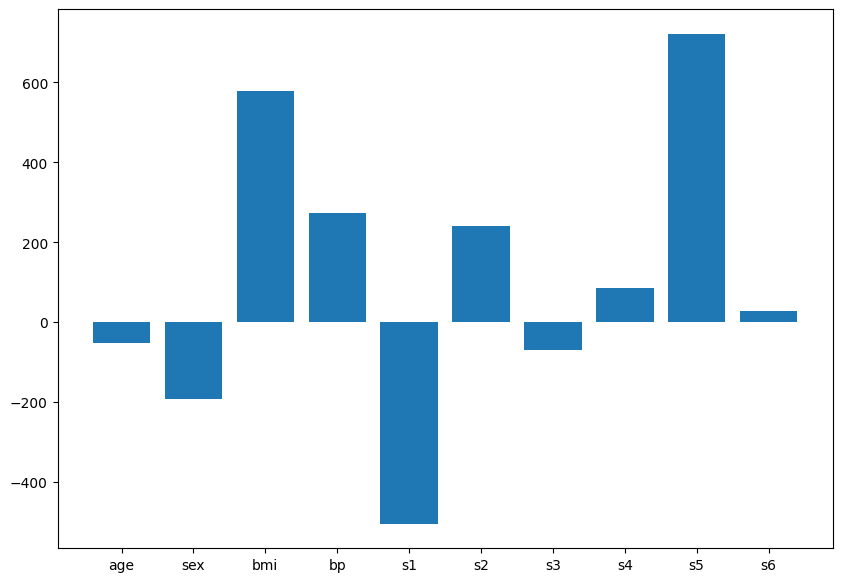

In [9]:
# パラメータの分布を棒グラフで可視化
columns = df.columns.tolist()[:-1]
plt.figure(figsize=(10, 7))
plt.bar(x=columns, height=model.coef_);

In [10]:
# 学習後のバイアス b
model.intercept_

np.float64(153.71901624380382)



*   回帰では、決定係数 (coefficient of determination) という指標で評価を行うのが一般的です




In [11]:
# Step 3：モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.553937891544893
test score :  0.39289927216962905


学習が終わったモデルに、新たな入力値を与えて予測値を計算させるには、predict() メソッドを用います。学習済みのモデルを使ったこのような計算は、推論 (inference) と呼ばれます。

本来であれば、まったく別のデータセットを与えるのですが、テスト用データセットからサンプルを 1 つ取り出し、推論を行ってみましょう。このとき、predict() メソッドに与える入力値の ndarray の形が (サンプルサイズ, 特徴量の数) となっている必要があることに気をつけてください。

# 推論

In [12]:
# 推論
y = model.predict(x_test)

In [13]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  239.6764622568394
目標値:  321.0


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. データの読み込み
train = pd.read_csv('diabetes_train.csv')  # 学習用
test  = pd.read_csv('diabetes_test.csv')   # 提出用

# 2. 説明変数と目的変数に分割
x_train = train.drop(columns=['target'])
y_train = train['target']

# 3. モデルの学習
model = LinearRegression()
model.fit(x_train, y_train)

# 4. 予測
preds = model.predict(x_test)

# 5. 提出用ファイルの作成
submission = pd.Series(preds, name='pred')

submission.to_frame().to_csv(
    'submission.csv',
    index=False,
)

In [24]:
# --- 回帰係数を特徴量と紐づけて DataFrame に ---
coeffs = model.coef_                   # 係数の配列
features = X_train.columns             # 特徴量名のリスト

coef_df = pd.DataFrame({
    'feature': features,
    'coef':    coeffs
})

# --- 影響力の大きさを比べるために絶対値を取ってソート ---
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

# --- 確認 ---
print(coef_df.head())


  feature        coef    abs_coef
8      s5  721.955802  721.955802
2     bmi  579.482776  579.482776
4      s1 -504.724014  504.724014
3      bp  272.464042  272.464042
5      s2  241.684419  241.684419
